In [61]:
import tweepy as tw
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
consumer_key = 'mGsFf8tqL8sLLmkgvVvE3HPjN'
consumer_secret = 'q5QSXYDM8nxkJHv8TeSlXkWY2MfLDMEPWkqa8bSFNB6MNhEnmH'
access_token = '1133675761141862400-Ur7UvngZcvdg5h4WIumm0IS3z31Off'
access_token_secret = 'lEDEJK96jKvXmOjvY63ZnoMabelGTPxrMtID7xJl8ByB5'

In [63]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [64]:
# search keyword to fetch tweets
search_word = "agneepath"+" -filter:retweets"

In [65]:
# Collecting tweets
tweets = tw.Cursor(api.search_tweets, q=search_word, lang="en").items(500)

In [66]:
# for tweet in tweets:
#     print(tweet)

In [67]:
# making list of required info(columns)
twt_list=[[tweet.user.screen_name, tweet.text,tweet.user.followers_count, tweet.created_at, tweet.user.location] for tweet in tweets]
twt_list

[['VikasYa82187431',
  '@varungandhi80 AGNEEPATH WILL PROVE TO BE DISASTER SOON.',
  32,
  datetime.datetime(2022, 7, 6, 19, 21, 37, tzinfo=datetime.timezone.utc),
  ''],
 ['AskSoundwave',
  "@ANINewsUP Mr.Yogi believes Muslim clerics blindly. Weather it's AgneePath Recruitment announcement either wishing some alleged Aman Chain.",
  74,
  datetime.datetime(2022, 7, 6, 19, 6, tzinfo=datetime.timezone.utc),
  ''],
 ['Horizon2weet',
  '@LostSanity9 @Rajat27336576 @md_tahir_ @satishacharya then why many changes were brought in immediately 😂😂😂 was VK… https://t.co/epZzuncZl4',
  17,
  datetime.datetime(2022, 7, 6, 17, 45, 12, tzinfo=datetime.timezone.utc),
  ''],
 ['RupenderUP1',
  "Kangana Ranaut has decided to support Agneepath.\nBut she would only support Amitabh's &amp; not Hritik's.",
  267,
  datetime.datetime(2022, 7, 6, 17, 42, 48, tzinfo=datetime.timezone.utc),
  'Hyderabad, India'],
 ['Pariksh78550507',
  "Student's faced a lot of Problems during #JEEMains2022 S-1\n• Server Failu

### Making Dataframe

In [68]:
df = pd.DataFrame(data=twt_list, columns=['user','tweet','followers','date', 'location'])
df

,user,tweet,followers,date,location
0,VikasYa82187431,@varungandhi80 AGNEEPATH WILL PROVE TO BE DISA...,32,2022-07-06 19:21:37+00:00,
1,AskSoundwave,@ANINewsUP Mr.Yogi believes Muslim clerics bli...,74,2022-07-06 19:06:00+00:00,
2,Horizon2weet,@LostSanity9 @Rajat27336576 @md_tahir_ @satish...,17,2022-07-06 17:45:12+00:00,
3,RupenderUP1,Kangana Ranaut has decided to support Agneepat...,267,2022-07-06 17:42:48+00:00,"Hyderabad, India"
4,Pariksh78550507,Student's faced a lot of Problems during #JEEM...,58,2022-07-06 17:24:04+00:00,"Lucknow,Uttar Pradesh"
...,...,...,...,...,...
495,Andhravilasnews,Pregnant woman carried through jungle to hospi...,2608,2022-06-30 11:53:43+00:00,USA
496,Pradeep_danda,Heyy...!\nDon't get emotional it's just a song...,55,2022-06-30 11:52:37+00:00,
497,NirmalS40569434,@CMOPb @BhagwantMann AAP government is doing a...,2,2022-06-30 11:45:55+00:00,
498,ThanjavurGuy,@butcherthem They can't do anything. If anyone...,1707,2022-06-30 11:45:27+00:00,"Chennai, Tamilnadu"


In [69]:
# df['tweet'] = df['tweet'].astype('string')
# df['tweet']

### Tokenizing words

In [70]:
word_tokens = word_tokenize(str(df['tweet']))
word_tokens

['0',
 '@',
 'varungandhi80',
 'AGNEEPATH',
 'WILL',
 'PROVE',
 'TO',
 'BE',
 'DISA',
 '...',
 '1',
 '@',
 'ANINewsUP',
 'Mr.Yogi',
 'believes',
 'Muslim',
 'clerics',
 'bli',
 '...',
 '2',
 '@',
 'LostSanity9',
 '@',
 'Rajat27336576',
 '@',
 'md_tahir_',
 '@',
 'satish',
 '...',
 '3',
 'Kangana',
 'Ranaut',
 'has',
 'decided',
 'to',
 'support',
 'Agneepat',
 '...',
 '4',
 'Student',
 "'s",
 'faced',
 'a',
 'lot',
 'of',
 'Problems',
 'during',
 '#',
 'JEEM',
 '...',
 '...',
 '495',
 'Pregnant',
 'woman',
 'carried',
 'through',
 'jungle',
 'to',
 'hospi',
 '...',
 '496',
 'Heyy',
 '...',
 '!',
 '\\nDo',
 "n't",
 'get',
 'emotional',
 'it',
 "'s",
 'just',
 'a',
 'song',
 '...',
 '497',
 '@',
 'CMOPb',
 '@',
 'BhagwantMann',
 'AAP',
 'government',
 'is',
 'doing',
 'a',
 '...',
 '498',
 '@',
 'butcherthem',
 'They',
 'ca',
 "n't",
 'do',
 'anything',
 '.',
 'If',
 'anyone',
 '...',
 '499',
 'Rebel',
 'Sena',
 'leader',
 'Eknath',
 'Shinde',
 'to',
 'be',
 'sworn-in',
 '...',
 'Name',


In [71]:
additional  = ['rt','rts','retweet']
# stop_words = set(stopwords.words("english"))
# NLTK stopwords + our local stopwords
swords = set().union(stopwords.words('english'),additional)
len(swords)
swords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [72]:
df['tweet']

0      @varungandhi80 AGNEEPATH WILL PROVE TO BE DISA...
1      @ANINewsUP Mr.Yogi believes Muslim clerics bli...
2      @LostSanity9 @Rajat27336576 @md_tahir_ @satish...
3      Kangana Ranaut has decided to support Agneepat...
4      Student's faced a lot of Problems during #JEEM...
                             ...                        
495    Pregnant woman carried through jungle to hospi...
496    Heyy...!\nDon't get emotional it's just a song...
497    @CMOPb @BhagwantMann AAP government is doing a...
498    @butcherthem They can't do anything. If anyone...
499    Rebel Sena leader Eknath Shinde to be sworn-in...
Name: tweet, Length: 500, dtype: object

In [73]:
# drop duplicate tweets
df.drop_duplicates(subset='tweet', inplace=True)

In [74]:
df.columns

Index(['user', 'tweet', 'followers', 'date', 'location'], dtype='object')

### Preprocessing tweets

In [75]:
df['processed_tweet'] = df['tweet'].str.lower()\
                        .str.replace('(@[a-z0-9]+)\w+',' ')\
                        .str.replace('(http\S+)', ' ')\
                        .str.replace(' +',' ')\
                        .apply(lambda x:[i for i in x.split() if not i in swords])

C:\Users\nitin\AppData\Local\Temp/ipykernel_2760/2345700266.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_tweet'] = df['tweet'].str.lower()\


In [76]:
df['processed_tweet']

0                    [agneepath, prove, disaster, soon.]
1      [mr.yogi, believes, muslim, clerics, blindly.,...
2        [many, changes, brought, immediately, 😂😂😂, vk…]
3      [kangana, ranaut, decided, support, agneepath....
4      [student's, faced, lot, problems, #jeemains202...
                             ...                        
495    [pregnant, woman, carried, jungle, hospital, v...
496    [heyy...!, get, emotional, song.....!, 🎶, mean...
497              [aap, government, lot, work, agneepath]
498    [can't, anything., anyone, wants, join, agneep...
499    [rebel, sena, leader, eknath, shinde, sworn-in...
Name: processed_tweet, Length: 500, dtype: object

### Stemming

In [77]:
ps = PorterStemmer()
df['stemmed'] = df['processed_tweet'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [78]:
df['stemmed']

0                      [agneepath, prove, disast, soon.]
1      [mr.yogi, believ, muslim, cleric, blindly., we...
2               [mani, chang, brought, immedi, 😂😂😂, vk…]
3      [kangana, ranaut, decid, support, agneepath., ...
4      [student', face, lot, problem, #jeemains2022, ...
                             ...                        
495    [pregnant, woman, carri, jungl, hospit, villag...
496    [heyy...!, get, emot, song.....!, 🎶, meanwhil,...
497                  [aap, govern, lot, work, agneepath]
498    [can't, anything., anyon, want, join, agneepat...
499    [rebel, sena, leader, eknath, shind, sworn-in,...
Name: stemmed, Length: 500, dtype: object

In [79]:
df.head(100)

,user,tweet,followers,date,location,processed_tweet,stemmed
0,VikasYa82187431,@varungandhi80 AGNEEPATH WILL PROVE TO BE DISA...,32,2022-07-06 19:21:37+00:00,,"[agneepath, prove, disaster, soon.]","[agneepath, prove, disast, soon.]"
1,AskSoundwave,@ANINewsUP Mr.Yogi believes Muslim clerics bli...,74,2022-07-06 19:06:00+00:00,,"[mr.yogi, believes, muslim, clerics, blindly.,...","[mr.yogi, believ, muslim, cleric, blindly., we..."
2,Horizon2weet,@LostSanity9 @Rajat27336576 @md_tahir_ @satish...,17,2022-07-06 17:45:12+00:00,,"[many, changes, brought, immediately, 😂😂😂, vk…]","[mani, chang, brought, immedi, 😂😂😂, vk…]"
3,RupenderUP1,Kangana Ranaut has decided to support Agneepat...,267,2022-07-06 17:42:48+00:00,"Hyderabad, India","[kangana, ranaut, decided, support, agneepath....","[kangana, ranaut, decid, support, agneepath., ..."
4,Pariksh78550507,Student's faced a lot of Problems during #JEEM...,58,2022-07-06 17:24:04+00:00,"Lucknow,Uttar Pradesh","[student's, faced, lot, problems, #jeemains202...","[student', face, lot, problem, #jeemains2022, ..."
...,...,...,...,...,...,...,...
95,I_DailyNews,Army recruitment rally in Tamil Nadu to recrui...,67,2022-07-05 18:00:13+00:00,"Noida, India","[army, recruitment, rally, tamil, nadu, recrui...","[armi, recruit, ralli, tamil, nadu, recruit, a..."
96,avi_408,@PTI_News This is the result of Unemployment. ...,4,2022-07-05 17:59:58+00:00,"New Delhi, India","[result, unemployment., pahle, #naujawano, ko,...","[result, unemployment., pahl, #naujawano, ko, ..."
97,hrithikbhakt11,Now wait is for #VikramVedha\nHope @PushkarGay...,3,2022-07-05 17:50:09+00:00,,"[wait, #vikramvedha, hope, complete, justice, ...","[wait, #vikramvedha, hope, complet, justic, ch..."
98,hrithikbhakt11,After #Agneepath hrithiks version everyone kno...,3,2022-07-05 17:50:08+00:00,,"[#agneepath, hrithiks, version, everyone, know...","[#agneepath, hrithik, version, everyon, know, ..."


### Sentiment Analysis

In [100]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...


True

In [101]:
sia = vd.SentimentIntensityAnalyzer()

In [102]:
from nltk.tokenize import word_tokenize

In [104]:
df['sentiment_score'] = df['processed_tweet'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [106]:
df[['processed_tweet','sentiment_score']].head(n=10)

,processed_tweet,sentiment_score
0,"[agneepath, prove, disaster, soon.]",-0.6249
1,"[mr.yogi, believes, muslim, clerics, blindly.,...",0.2263
2,"[many, changes, brought, immediately, 😂😂😂, vk…]",0.0000
3,"[kangana, ranaut, decided, support, agneepath....",0.8038
4,"[student's, faced, lot, problems, #jeemains202...",-0.9125
5,"[student's, faced, lot, problems, #jeemains202...",-0.9125
6,"[student's, faced, lot, problems, #jeemains202...",-0.9125
7,"[help, us, mam, please, raise, voice., indian,...",0.5921
8,"[india, asks:-, people, died, demonetisation, ...",-0.5574
9,"[india, asks:-, people, died, demonetisation, ...",-0.5574


In [111]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    402
 1     51
-1     41
-2      4
 2      2
Name: sentiment_score, dtype: int64

<AxesSubplot:>

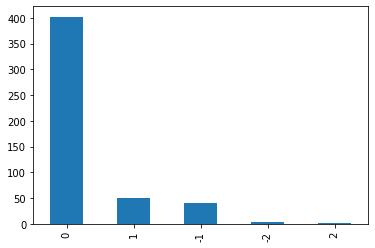

In [112]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts().plot(kind="bar", x="sentiment", y="count")

### User audience category(followers count)

In [80]:
df['user_audience_category'] = pd.cut(df['followers'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [81]:
df['user_audience_category']

0       small
1       small
2       small
3       small
4       small
        ...  
495    medium
496     small
497     small
498    medium
499    medium
Name: user_audience_category, Length: 500, dtype: category
Categories (3, object): ['small' < 'medium' < 'wide']

### Word cloud

In [82]:
import re
bigstring = re.sub('[a-z]',' ',str(df['processed_tweet']))
bigstring=df['processed_tweet'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
bigstring
# df['processed_tweet']

'agneepath prove disaster soon. mr.yogi believes muslim clerics blindly. weather agneepath recruitment announcement either wishing alleged aman chain. many changes brought immediately 😂😂😂 vk… kangana ranaut decided support agneepath. would support amitabh\'s &amp; hritik\'s. student\'s faced lot problems #jeemains2022 s-1 • server failure test(ques visible sc… student\'s faced lot problems #jeemains2022 ses-1 • server failure test(ques visible on… student\'s faced lot problems #jeemains2022 s-1 • server failure test(ques visible sc… help us mam please raise voice. indian navy conducting offline exam th… india asks:- people died demonetisation country\'s economy deteriorated peasant movement continued at… india asks:- people died demonetisation country\'s economy deteriorated peasant movement continued at… befitting reply sponsored riots central government\'s agnipath scheme. 7.5 lakh applicati… india asks:- people died demonetisation country\'s economy deteriorated peasant movement con

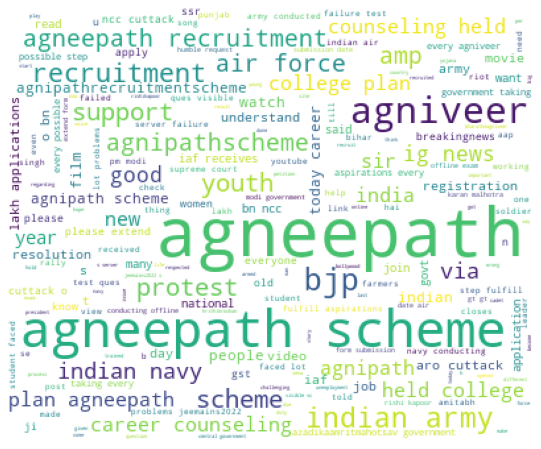

In [83]:
wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=400,
                          height=330
                         ).generate_from_text(bigstring)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)

## Location of tweets

In [84]:
locs = df['location'].value_counts()
locs.drop('', inplace=True)
locs = locs[locs>=5]

In [85]:
locs

India               32
dera ismail khan    20
New Delhi, India    17
USA                 15
Noida, India        11
Mumbai, India       11
Kolkata, India       6
भारत                 6
Ahmedabad            5
Name: location, dtype: int64

In [86]:
# mapping={"India":"Noida, New Delhi, Mumbai, Kolkata, Ahmedabad, Hyderabad"}

In [87]:
# df['location']=df['location'].apply(lambda x: mapping[x] if x in mapping.keys() else x)
# df['location']

Text(0.5, 0.98, 'Top locations of tweets')

c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: U

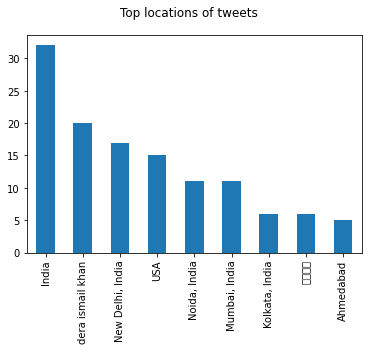

In [88]:
locs.plot(kind='bar', y="count", x="location")
plt.suptitle('Top locations of tweets')

### Top Hashtags

In [89]:
hashtags = df['tweet'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [90]:
hashtags.head(10)

,hashtag,occurences
1,#agneepath,56.0
8,#agnipathscheme,17.0
7,#agnipathrecruitmentscheme,13.0
11,#agniveer,11.0
4,#agnipath,7.0
19,#azadikaamritmahotsav,7.0
34,#breakingnews,7.0
59,#jeemains2022,6.0
96,#shamshera,4.0
28,#bjp,4.0


Text(0.5, 0.98, 'Top 10 Hashtags for keyword: AGNEEPATH')

<Figure size 1008x504 with 0 Axes>

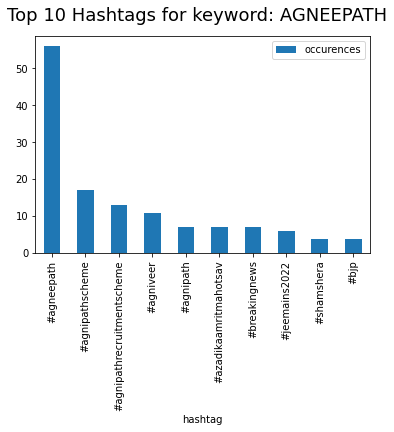

In [91]:
plt.figure(figsize=(14,7))
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
plt.grid(False)
plt.suptitle('Top 10 Hashtags for keyword: AGNEEPATH', fontsize=18)

### Top mentioned users

In [92]:
top_mentioned_users = df['tweet'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]
top_mentioned_users

@narendramodi       15.0
@YouTube            12.0
@PMOIndia           12.0
@IAF                10.0
@kalinga            10.0
@rajnathsingh        8.0
@adgpi               7.0
@DefenceMinIndia     7.0
@INCIndia            6.0
@indiannavy          6.0
dtype: float64

Text(0.5, 0.98, 'Top 10 Users for keyword: AGNEEPATH')

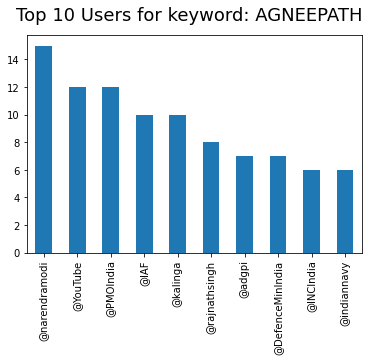

In [93]:
top_mentioned_users.plot(kind='bar')
plt.grid(False)
plt.suptitle('Top 10 Users for keyword: AGNEEPATH', fontsize=18)

### Most occuring words

In [94]:
words = df['processed_tweet'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [95]:
words.head(10)

,word,occurences
36,agneepath,108.0
686,scheme,60.0
69,army,25.0
370,indian,24.0
636,recruitment,21.0
320,government,18.0
566,plan,17.0
43,air,14.0
338,held,13.0
139,career,13.0


Text(0.5, 0.98, 'Top 10 Words for keyword: AGNEEPATH')

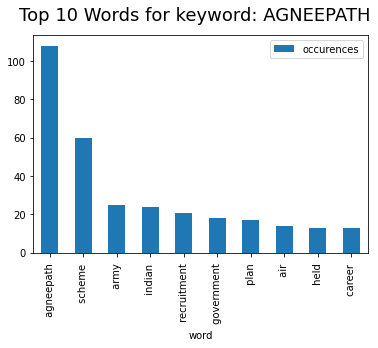

In [96]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.suptitle('Top 10 Words for keyword: AGNEEPATH', fontsize=18)

### Most occuring bigram words

In [97]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_tweet'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()
bigramseries

(agneepath, scheme)         60
(indian, army)              20
(air, force)                17
(agneepath, recruitment)    15
(ig, news)                  15
                            ..
(becomes, (sorry))           1
((sorry), rakhail)           1
(rakhail, like)              1
(like, beswara)              1
((ld), #indiapolitics…)      1
Length: 3335, dtype: int64

In [98]:
bigramseries.head(10)

(agneepath, scheme)         60
(indian, army)              20
(air, force)                17
(agneepath, recruitment)    15
(ig, news)                  15
(counseling, held)          14
(held, college)             14
(college, plan)             14
(plan, agneepath)           14
(career, counseling)        13
dtype: int64

<AxesSubplot:>

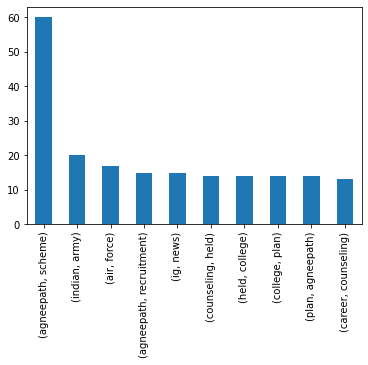

In [99]:
bigramseries[:10].plot(kind='bar')
# plt.suptitle('Top 10 Bigrams for keyword: AGNEEPATH', fontsize=18)